# 幅優先探索（ルートの探索：すべての経路を通る）

## インストールが必要なライブラリ
Anacondaの場合は一度だけ必要となる場合がある

In [1]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ライブラリのインポート



In [2]:
import numpy as np
from itertools import chain

## 幅優先探索

In [3]:
connect = [[1, 2], [2,  3,  4], [1, 4], [1, 4, 5], [1, 3, 5], []]
prev = [-1]*(max(chain(*connect))+1)

open_list = [0]
close_list = []

while open_list:
    now = open_list.pop(0)
    close_list.append(now)
    for i in connect[now]:
        if not(i in close_list):
            open_list.append(i)
            prev[i] = now

print(close_list)
print(prev)

[0, 1, 2, 2, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
[-1, 0, 1, 1, 3, 4]


## 経路の表示

In [4]:
p = 5
route = []
route.append(p)
while p:
    p = prev[p]
    route.append(p)
    print(p)
print(route)

4
3
1
0
[5, 4, 3, 1, 0]


## 以下、可視化するための処理

## 可視化するためにインストールが必要なライブラリ

In [5]:
!pip install networkx#可視化するときに必要
!pip install matplotlib#可視化するときに必要
!pip install pydot graphviz#可視化するときに必要
#!conda install python-graphviz#anacondaで実行するときに必要、cmd promptで実行する必要がある

ERROR: Invalid requirement: 'networkx#可視化するときに必要'
ERROR: Invalid requirement: 'matplotlib#可視化するときに必要'
ERROR: Invalid requirement: 'graphviz#可視化するときに必要'


## 可視化するためのライブラリのインポート

In [6]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout#表示用
import matplotlib.pyplot as plt#表示用
import matplotlib.animation as animation#アニメーション用
from IPython.display import HTML#アニメーション用

## graphvizで表示するためのデータ形式の変換

In [7]:
tree_graph = []
for i, tr in enumerate(connect):
    for j in tr:
        tree_graph.append((i,j))
print(tree_graph)

[(0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 1), (2, 4), (3, 1), (3, 4), (3, 5), (4, 1), (4, 3), (4, 5)]


## graphvizで表示

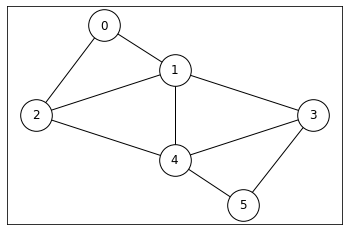

In [8]:
G = nx.Graph()  # 無向グラフ
G.add_nodes_from(range(max(chain(*connect))+1))
G.add_edges_from(tree_graph)
pos = graphviz_layout(G, prog="dot")
nx.draw_networkx(G, pos, node_color='w', edgecolors='k', edge_color='k', node_size=1000, with_labels=True)


## アニメーション表示用
ノードの色の決定

In [9]:
def MakeField(maxnode, close_list, route):
    pc = ['w']*maxnode

    for i in close_list:#探索済み（クローズドリスト）の色
        pc[i]='lightgray'#白黒表示
#        pc[i]='lightsalmon'#カラー表示
    if len(close_list)>0:#探索対象となるノードの色
        pc[close_list[-1]]='gray'#白黒表示
#        pc[close_list[-1]]='lightgreen'#カラー表示
    for i in route:#ルートの表示用
        pc[i]='dimgray'#白黒表示
#        pc[i]='cyan'#カラー表示
    return pc

## アニメーションの表示

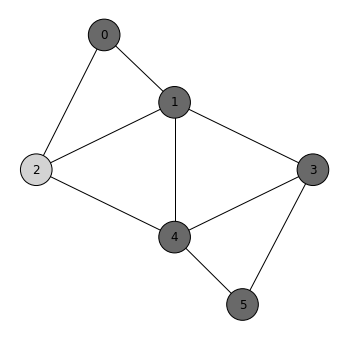

In [10]:
n = 0

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
def update(k):
    global n
    plt.cla()
    plt.axis('off')
    if n<len(close_list):
        pc = MakeField(len(list(G)), close_list[:n], [])
    else:
        pc = MakeField(len(list(G)), close_list, route[:n-len(close_list)])

    nx.draw_networkx(G, pos, node_color=pc, edgecolors='k', edge_color='k', node_size=1000, with_labels=True)
    n = n + 1
    
ani = animation.FuncAnimation(fig, update, interval = 100, frames = len(close_list)+len(route), repeat=False)
HTML(ani.to_jshtml())#jupyter notebookに表示
#ani.save("anim.gif")#gifアニメーションファイルの保存